In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [2]:
coke = pd.read_excel(r"C:\Users\Mohan Patil\OneDrive\Desktop\Datasets\CocaCola_Sales_Rawdata.xlsx",index_col=0,parse_dates=True)
coke

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [3]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


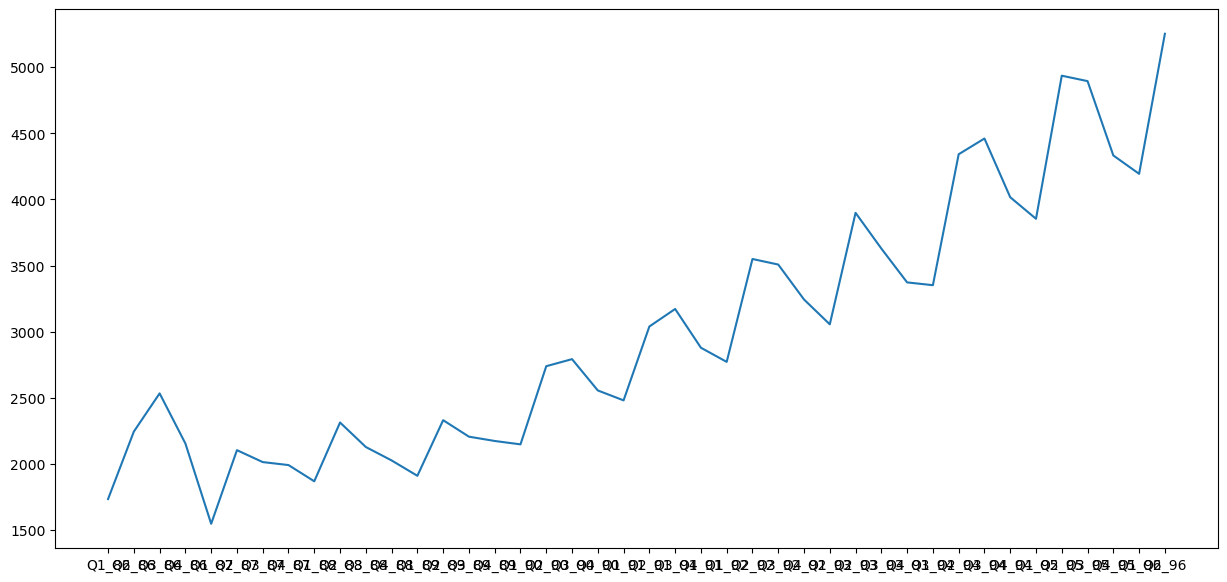

In [4]:
plt.figure(figsize=(15,7))
plt.plot(coke)

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

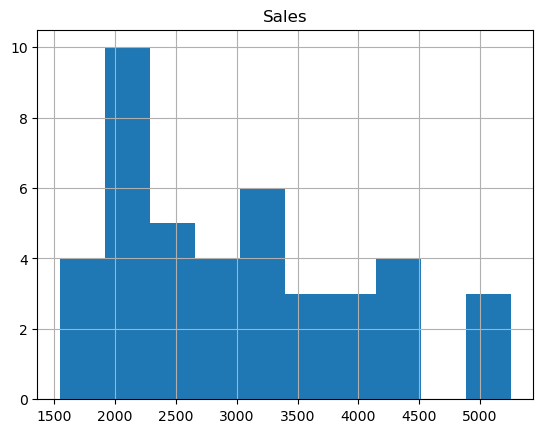

In [5]:
# histogram
coke.hist()

<AxesSubplot:ylabel='Density'>

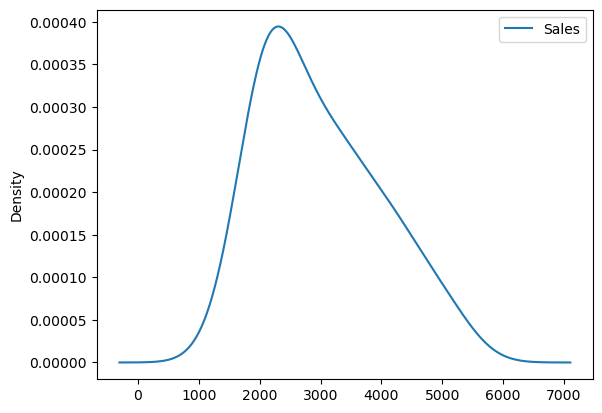

In [6]:
# density plot
coke.plot(kind='kde')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

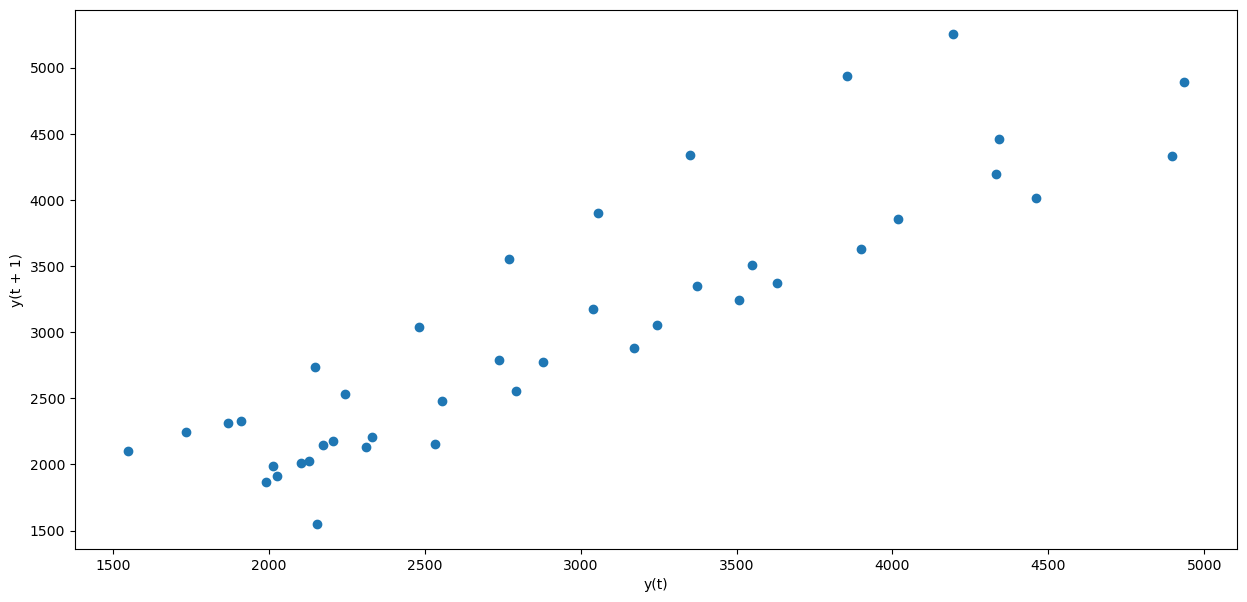

In [7]:
# Lagplot
plt.figure(figsize=(15,7))
pd.plotting.lag_plot(coke)

<Figure size 2500x2000 with 0 Axes>

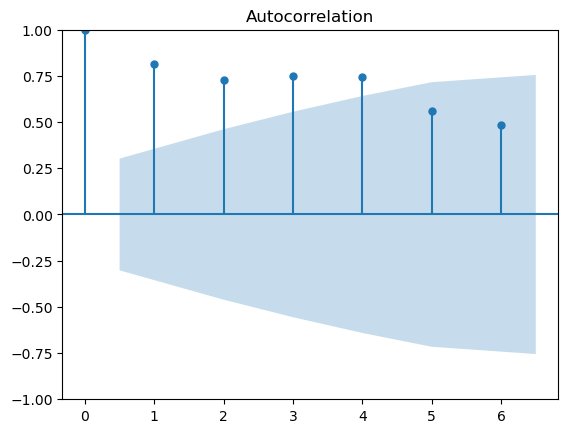

In [8]:
# Create auto correlation plot
plt.figure(figsize=(25,20))
plot_acf(coke,lags=6)
plt.show()

In [9]:
type(coke)

pandas.core.frame.DataFrame

In [10]:
coke.shape

(42, 1)

## sampling And Transformation

In [11]:
coke1 = pd.read_excel(r"C:\Users\Mohan Patil\OneDrive\Desktop\Datasets\CocaCola_Sales_Rawdata.xlsx")

In [12]:
quarter = ['Q1','Q2','Q3','Q4']
c=coke1['Quarter'][0]
c[0:2]
coke1['quarter']=0

for i in range(42):
    c = coke1['Quarter'][i]
    coke1['quarter'][i]=c[0:2]
coke1

C:\Users\Mohan Patil\AppData\Local\Temp\ipykernel_26700\1115282948.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coke1['quarter'][i]=c[0:2]


,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [13]:
quarter_dummy = pd.DataFrame(pd.get_dummies(coke1['quarter']))
quarter_dummy

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [14]:
cokes = pd.concat([coke1,quarter_dummy],axis=1)
cokes

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


### calculate value of t,t_sqaure,log and in data

In [15]:
cokes.shape

(42, 7)

In [16]:
cokes['t']=np.arange(1,43)
cokes['t_square']=np.square(cokes.t)
cokes['log_Sales']=np.log(cokes.Sales)
cokes

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


<AxesSubplot:>

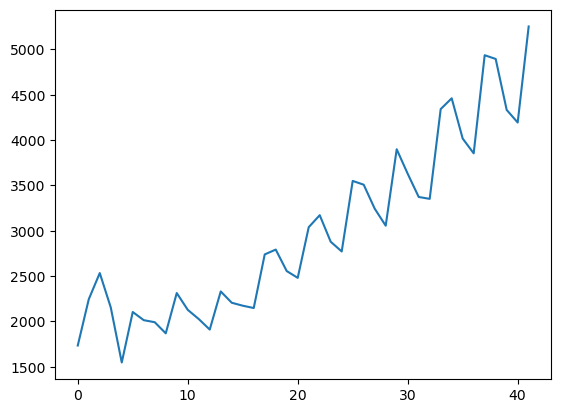

In [17]:
cokes['Sales'].plot()

<AxesSubplot:xlabel='quarter', ylabel='Sales'>

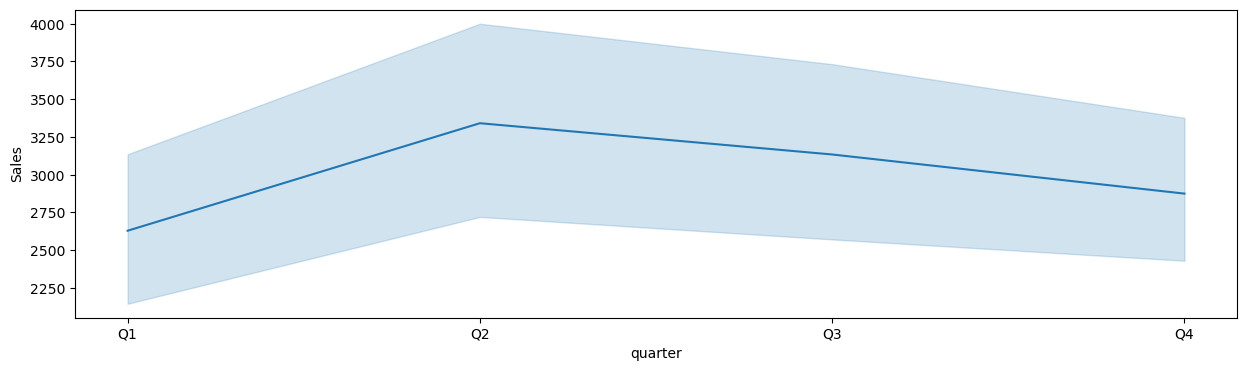

In [18]:
# Lineplot on Transform data
plt.figure(figsize=(15,4))
sns.lineplot(x='quarter',y='Sales',data=cokes)

### Spliting the data

In [19]:
cokes.shape

(42, 10)

In [20]:
train = cokes.head(35)
test = cokes.tail(7)
train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [21]:
test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


# Forecasting - Model_Based_Methods

In [22]:
import statsmodels.formula.api as smf

In [41]:
# Linear model
linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

636.5072930351143

In [42]:
# Exponential model
exp_model = smf.ols('log_Sales~t',data=train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

493.34864848421216

In [43]:
# Quadratic model
quad_model = smf.ols('Sales~t+t_square',data=train).fit()
pred_quad = pd.Series(quad_model.predict(test[['t','t_square']]))
rmse_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_quad

511.811731941759

In [44]:
# Additive seasonality model
add_sea_model = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea_model.predict(test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1861.8704164251737

In [45]:
# Additive Seasonality Quadratic 
add_sea_quad_model = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad_model.predict(test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

309.4641395163552

In [46]:
# Multiplicative Seasonality
mult_sea_model = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_sea = pd.Series(mult_sea_model.predict(test))
rmse_mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

1938.9332351966077

In [47]:
# Multiplicative Additive Seasonality 
mul_add_sea_model = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea_model.predict(test))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea

339.1874666994819

In [48]:
#Multiplicative Seasonality Quadratic 
mult_sea_quad_model = smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_quad_model.predict(test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

4515.62473844014

In [49]:
# Compare the results
data = {"Model":pd.Series(['rmse_linear','rmse_exp','rmse_quad','rmse_add_sea','rmse_add_sea_quad','rmse_mult_sea','rmse_mult_add_sea','rmse_mult_sea_quad'])
        ,"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea,rmse_mult_sea_quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,Model,RMSE_Values
4,rmse_add_sea_quad,309.464140
6,rmse_mult_add_sea,339.187467
1,rmse_exp,493.348648
2,rmse_quad,511.811732
0,rmse_linear,636.507293
3,rmse_add_sea,1861.870416
5,rmse_mult_sea,1938.933235
7,rmse_mult_sea_quad,4515.624738


In [50]:
# Build the Model On Full dataset
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=cokes).fit()

In [52]:
pred_new  = pd.Series(model_full.predict(cokes))
pred_new

0     1626.592727
1     2268.402339
2     2189.685821
3     1867.242917
4     1658.311143
5     2314.185178
6     2249.533083
7     1941.154603
8     1746.287252
9     2416.225709
10    2365.638037
11    2071.323979
12    1890.521051
13    2574.523931
14    2538.000682
15    2257.751047
16    2091.012542
17    2789.079845
18    2766.621019
19    2500.435807
20    2347.761724
21    3059.893450
22    3051.499047
23    2799.378257
24    2660.768598
25    3386.964746
26    3392.634766
27    3154.578400
28    3030.033163
29    3770.293734
30    3790.028177
31    3566.036233
32    3455.555419
33    4209.880414
34    4243.679279
35    4033.751758
36    3937.335367
37    4705.724784
38    4753.588072
39    4557.724974
40    4475.373006
41    5257.826846
dtype: float64

In [53]:
cokes['forcasted_sales']=pd.Series(np.exp(pred_new))

C:\Users\Mohan Patil\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


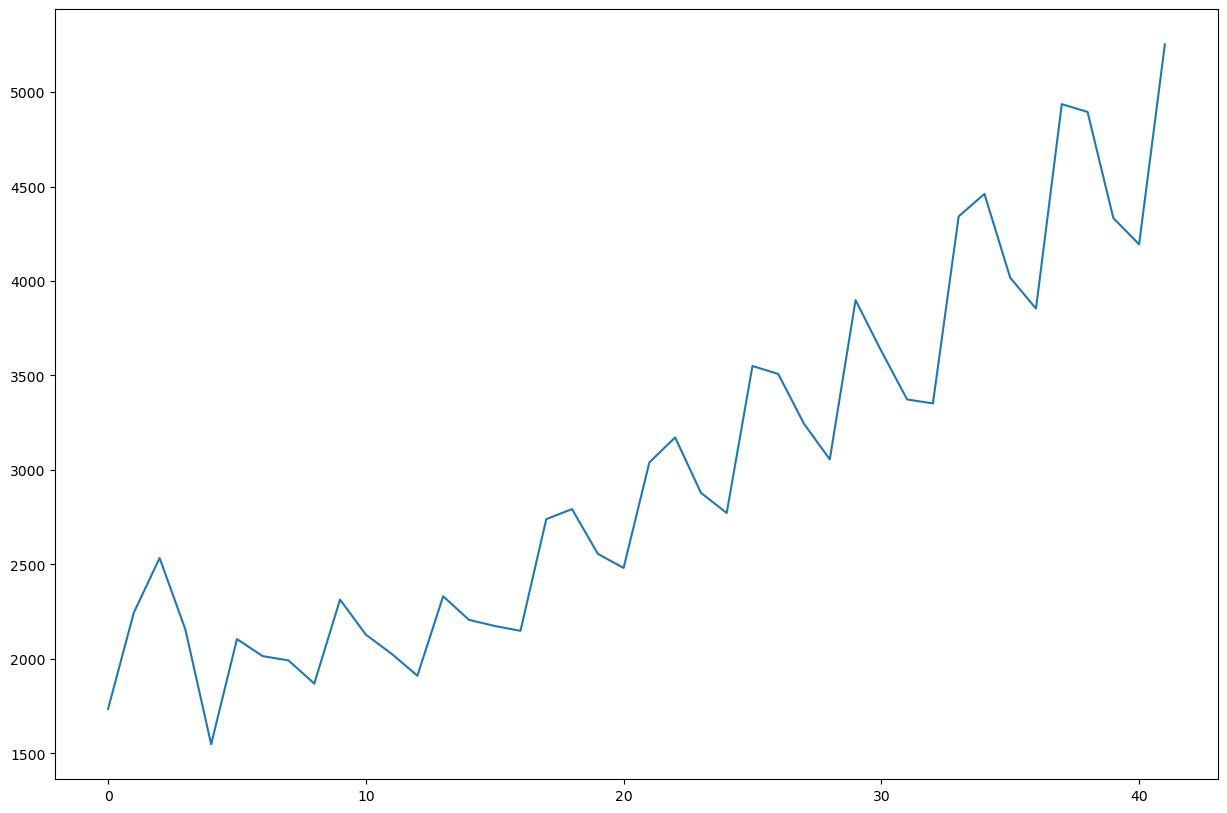

In [54]:
plt.figure(figsize=(15,10))
plt.plot(cokes[['Sales','forcasted_sales']].reset_index(drop=True))

# Moving Average

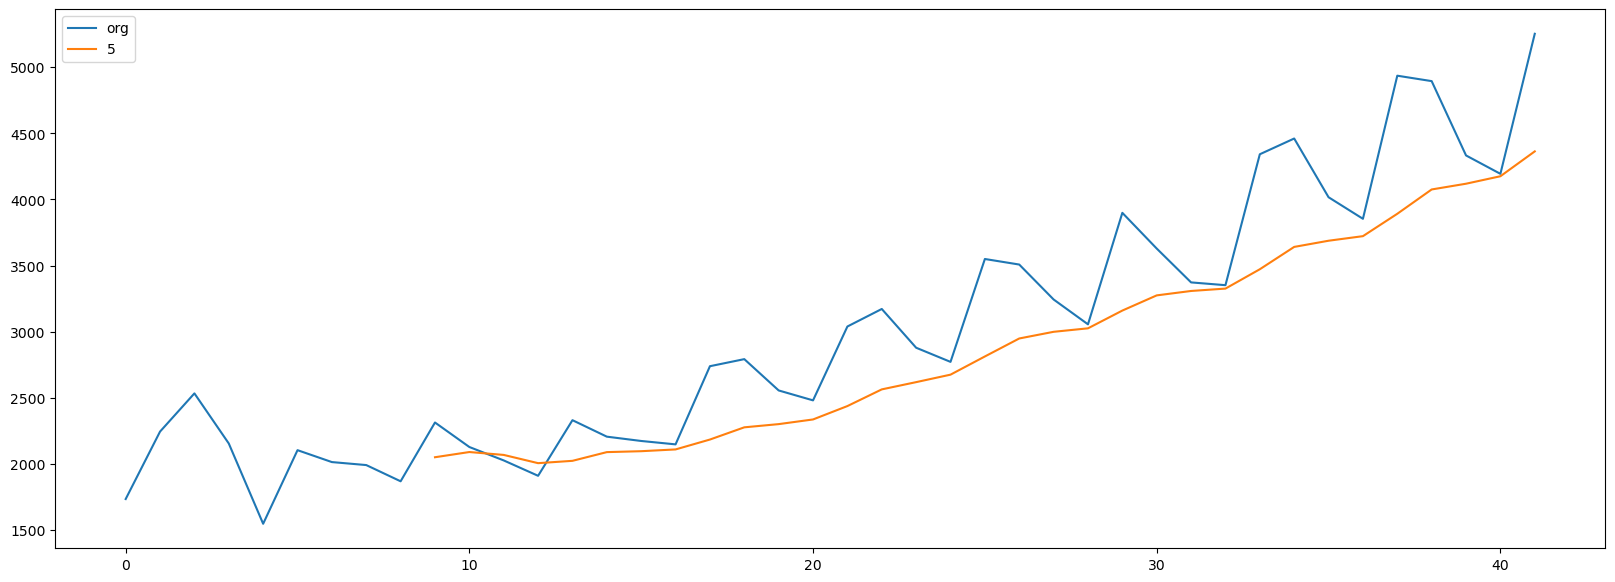

In [58]:
plt.figure(figsize=(20,7))
cokes['Sales'].plot(label='org')
cokes['Sales'].rolling(10).mean().plot(label=str(5))
plt.legend(loc='best')

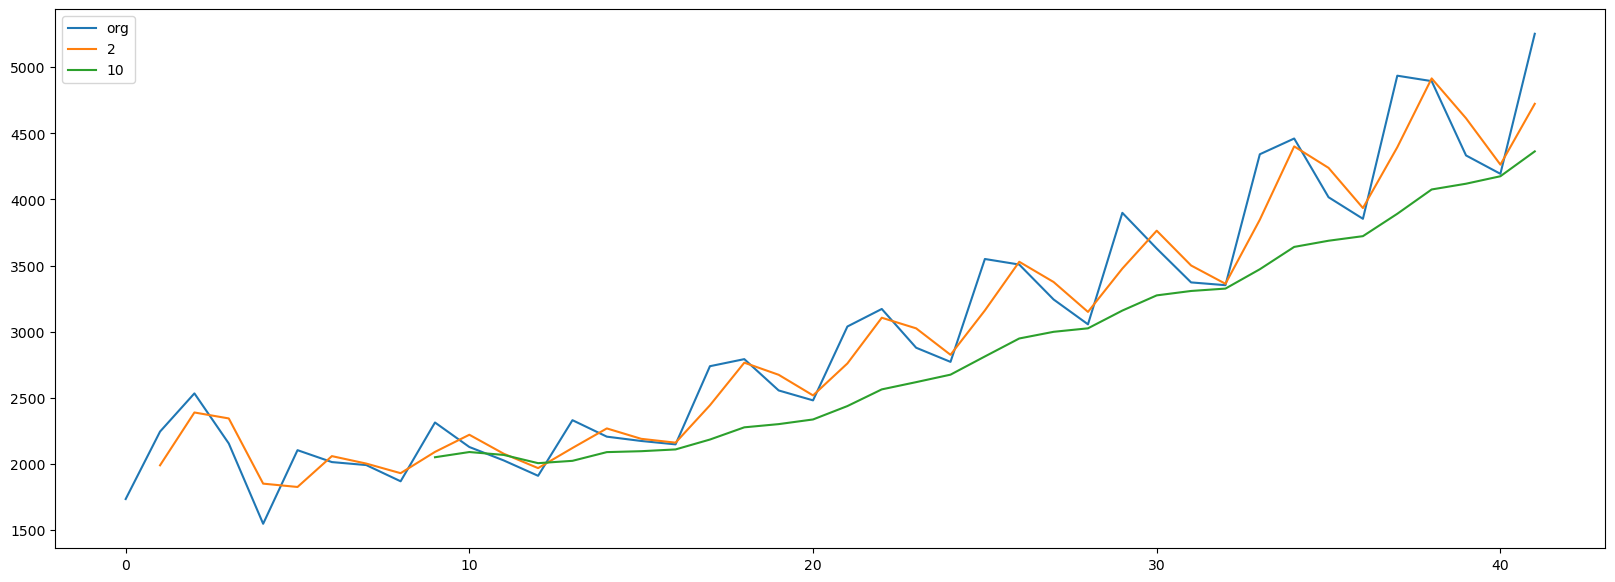

In [59]:
plt.figure(figsize=(20,7))
cokes['Sales'].plot(label='org')
for i in range(2,14,8):
    cokes['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

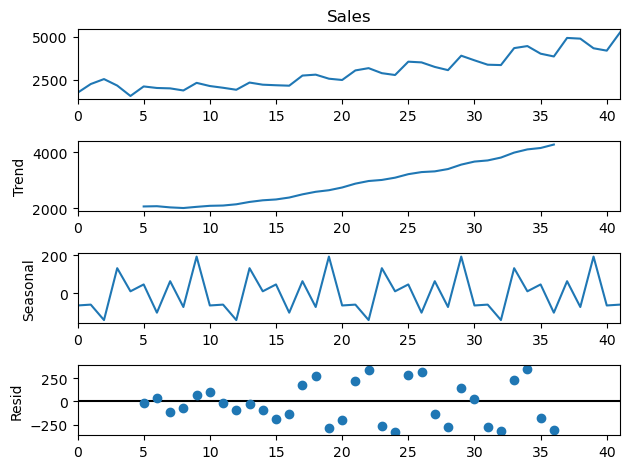

In [61]:
# Time Series decomposition Plot
from statsmodels.tsa.seasonal import seasonal_decompose
time_series = seasonal_decompose(cokes['Sales'],period=10)
time_series.plot()
plt.show()

# ACF plots and PACF plots

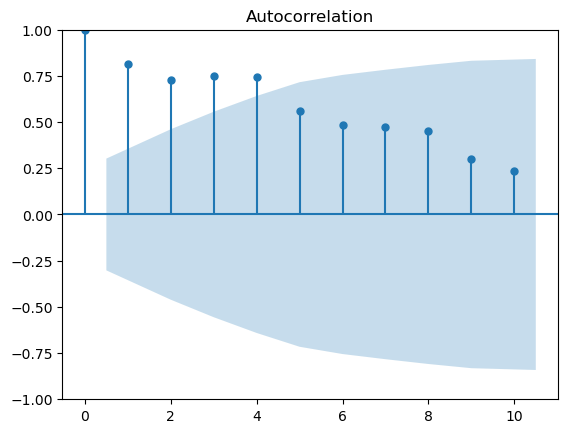

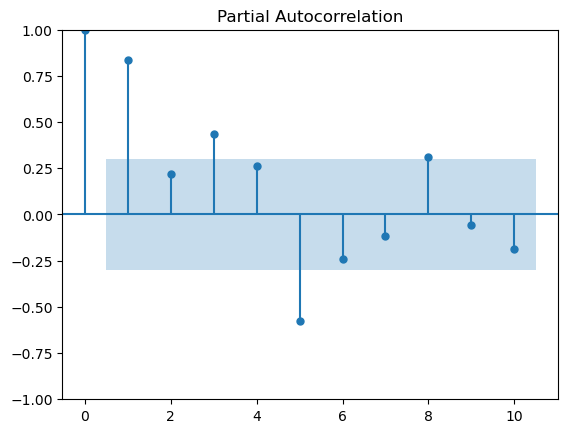

In [63]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cokes.Sales,lags=10)
tsa_plots.plot_pacf(cokes.Sales,lags=10)
plt.show()

In [64]:
# User define Mape fuction
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

### Simple Exponential method

In [68]:
# Split the data 
train = cokes.head(35)
test = cokes.tail(12)

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

sim_exp = SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.2)
pred_sim_exp = sim_exp.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_sim_exp,test.Sales)

18.30508180083287

### Holts method

In [69]:
from statsmodels.tsa.holtwinters import Holt
ht_model = Holt(train['Sales']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_ht = ht_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ht,test.Sales)

C:\Users\Mohan Patil\AppData\Local\Temp\ipykernel_26700\2017692429.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ht_model = Holt(train['Sales']).fit(smoothing_level=0.8,smoothing_slope=0.2)


11.955619117673248

## holts Exponential_smoothing with additive seasonality and additive trend

In [71]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp_smt_add_model = ExponentialSmoothing(train['Sales'],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_exp_smt_add = exp_smt_add_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_exp_smt_add,test.Sales)

4.8481839745072

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [72]:
exp_smt_mul_model = ExponentialSmoothing(train['Sales'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_exp_mul_add = exp_smt_mul_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_exp_mul_add,test.Sales)

4.097669827751749

In [73]:
# Final Model 
final_model_Exp =ExponentialSmoothing(cokes['Sales'],seasonal='mul',trend='add',seasonal_periods=12).fit()
# Forcast for next 10 times
final_model_Exp.forecast(10)

42    5012.147440
43    4645.260903
44    4490.053377
45    5638.551712
46    5671.720685
47    5107.131442
48    4834.680254
49    6127.684114
50    6109.530409
51    5503.868389
dtype: float64

#### Inference : Holts winter exponential smoothing with multiplicative seasonality and additive trend gives minimum error- 4.09 